### <a href='#section1'>1. Изучение и проверка данных</a>
### <a href='#section2'>2. Построение и изучение графиков</a>

### <a id=section1>1.Изучение и проверка данных</a> 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [19]:
models_and_flights = pd.read_csv('/datasets/query_1.csv')
models_and_flights.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [20]:
models_and_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [21]:
models_and_flights.describe()

,flights_amount
count,8.00
mean,"2,035.62"
std,"1,965.20"
min,300.00
25%,605.25
50%,795.00
75%,"4,250.25"
max,"4,557.00"


In [22]:
models_and_flights.duplicated().sum()

0

In [23]:
city_and_flights = pd.read_csv('/datasets/query_3.csv')
city_and_flights.head(10)

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
5,Барнаул,2.61
6,Белгород,6.00
7,Белоярский,2.00
8,Благовещенск,1.00
9,Братск,1.00


In [24]:
city_and_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [25]:
city_and_flights.describe()

,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


In [26]:
city_and_flights.duplicated().sum()

0

#### Вывод: данные в таблицах изучены, каких-то аномалий либо пропусков не обнаружено, типы данных корректны.

### <a id=section2>2.Построение и изучение графиков</a> 

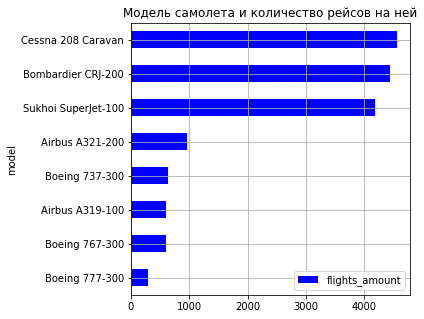

In [6]:
#построим график по моделям самолетов и количеству рейсов на них
model_and_flights_top = models_and_flights.sort_values(by='flights_amount', ascending=False).head(10)
model_and_flights_top.sort_values(by='flights_amount').\
    plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(5, 5),\
    title='Модель самолета и количество рейсов на ней', color='b')
plt.show()

### 3 модели значительно выделяются по количеству полетов: Cessna 208 Caravan,  Bombardier CRJ-200 и Sukhoi SuperJet 100. Если 2 и 3 место не вызвает удивления, то лидерство одномоторного самолета, который используют на авиалиниях малой протяженности очень интересно.

_Дополнение: вместимость Cessna 208 Caravan всего 14 человек, полагаю что ее используют преимущественно для полетов между небольшими городами на севере страны, особенно для перевозки бригад нефтянников, отсюда и такое большое количество рейсов. Bombardier CRJ-200 уже побольше вместимость - 50 человек и она занимает в основном транспортные пути между областными городами. На последнем месте Boeing 777-300 – самый крупный двухдвигательный широкофюзеляжный самолет, предназначенный для эксплуатации на дальних авиалиниях, поэтому его и используют значительно редко, лишь для дальних рейсов между крупными городами._

In [27]:
#находим топ-10 городов по количеству рейсов
city_and_flights_top10 = city_and_flights.sort_values(by='average_flights', ascending=False).head(10)
city_and_flights_top10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


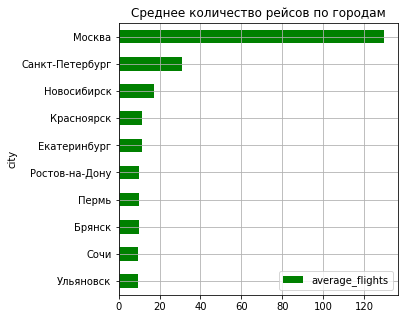

In [28]:
city_and_flights_top10.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(5, 5),\
    title='Среднее количество рейсов по городам', color='g')
plt.show()

#### Строить график по всем городам нет смысла, поэтому просто посмотрим какие города компания обделяет транспортным потоком.

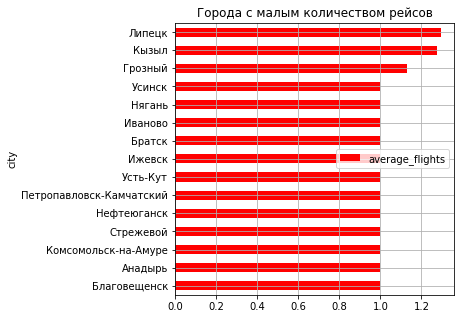

In [29]:
city_and_flights_bottom = city_and_flights.sort_values(by='average_flights', ascending=True).head(15)
city_and_flights_bottom.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(5, 5),\
    title='Города с малым количеством рейсов', color='r')
plt.show()

### Вывод: Неудивительно, что лидирует Москва, ведь это главный транспортный хаб страны. Также стоит отметить Санкт-Петербург и Новосибирск, которые имеют довольно весомое количество рейсов в день. 12 городов имеют всего по рейсу в день, хотя среди них есть довольно крупные.